# Problem set #4

## MACS 30150, Dr. Evans
## Yiqing Zheng

## Problem 1

part (a)

In [1]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
data = np.loadtxt('data\incomes.txt')

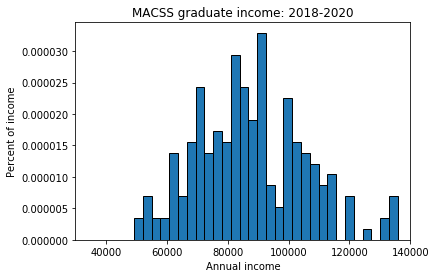

In [4]:
import matplotlib.pyplot as plt
num_bins = 30
plt.hist(data, num_bins, normed=True, edgecolor='k')
plt.title('MACSS graduate income: 2018-2020')
plt.xlabel(r'Annual income')
plt.ylabel('Percent of income')
plt.xlim([30000, 140000]);

part (b)

In [5]:
import scipy.stats as sts

def log_norm_pdf(x, mu, sigma):
    return (x * sigma * (2 * np.pi)**0.5)**(-1) * np.exp(-(np.log(x) - mu)**2/(2 * sigma**2))

def trunc_log_norm(x, mu, sigma, cut_lb, cut_ub):
    
    if cut_ub == "None" and cut_lb == "None":
        prob_notcut = 1.0
    
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu))
    
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu))
    
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu)) - sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu))
    
    pdf_vals = log_norm_pdf(x, mu, sigma)/prob_notcut
    return pdf_vals

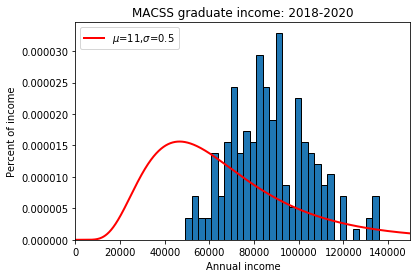

In [6]:
plt.hist(data, num_bins, normed=True, edgecolor='k')
plt.title('MACSS graduate income: 2018-2020')
plt.xlabel(r'Annual income')
plt.ylabel('Percent of income')

sample = np.linspace(0, 150000, 200000)
plt.plot(sample, trunc_log_norm(sample, 11, 0.5, 0, 150000),linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')
plt.xlim([0, 150000]);
# The red line is the graph for lognormal PDF

In [7]:
def log_like_value(x, mu, sigma, cut_lb, cut_ub):
    ln_pdf_vals = np.log(trunc_log_norm(x, mu, sigma, cut_lb, cut_ub))
    log_like_val = ln_pdf_vals.sum()
    return log_like_val

In [8]:
log_sum = log_like_value(data, 11, 0.5, 0, 150000)
print(f'The log likelihood value for the given data is {log_sum}.')

The log likelihood value for the given data is -2379.120591931827.


part (c)

In [9]:
import scipy.optimize as opt

In [10]:
def crit(params, *args):
    mu, sigma = params
    x, cut_lb, cut_ub = args
    log_sum = log_like_value(x, mu, abs(sigma), cut_lb, cut_ub)
    neg_log_sum = -log_sum
    
    return neg_log_sum

In [11]:
mu_init = 11
sigma_init = 0.2
params_init = np.array([mu_init, sigma_init])
mle_args = (data, 0, 150000)
results = opt.minimize(crit, params_init, args=(mle_args))

In [12]:
mu_MLE, sigma_MLE = results.x
func_value = -results.fun
hess = results.hess_inv
print(f'The ML estimates is {mu_MLE:.2f} for mean and {sigma_MLE:.2f} for sigma.\n')
print(f'The value of the likelihood function is {func_value}.\n')
print(f'The variance-covariance matrix: \n{hess}.')

The ML estimates is 11.36 for mean and 0.21 for sigma.

The value of the likelihood function is -2240.934337511636.

The variance-covariance matrix: 
[[ 0.0002172 -0.0001035]
 [-0.0001035  0.0001117]].


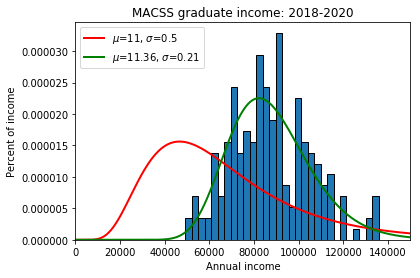

In [13]:
plt.hist(data, num_bins, normed=True, edgecolor='k')
plt.title('MACSS graduate income: 2018-2020')
plt.xlabel(r'Annual income')
plt.ylabel('Percent of income')

sample = np.linspace(0, 150000, 200000)
plt.plot(sample, trunc_log_norm(sample, 11, 0.5, 0, 150000),linewidth=2, color='r', label='$\mu$=11, $\sigma$=0.5')
plt.plot(sample, trunc_log_norm(sample, mu_MLE, sigma_MLE, 0, 150000),linewidth=2, color='g', label='$\mu$=11.36, $\sigma$=0.21')
plt.legend(loc='upper left')
plt.xlim([0, 150000]);
# The red line is the graph for lognormal PDF

part (d)

In [14]:
mu_new, sigma_new = np.array([11, 0.5])
log_like_h0 = log_like_value(data, mu_new, sigma_new, 0, 150000)
print('hypothesis value log likelihood', log_like_h0)
log_like_mle = func_value
print('MLE log likelihood', log_like_mle)

hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.934337511636


In [15]:
LR_val = 2 * (log_like_mle - log_like_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('likelihood ratio value', LR_val)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

likelihood ratio value 276.3725088403826
chi squared of H0 with 2 degrees of freedom p-value =  0.0


The null hypothesis is rejected since the p-value is very small.

part (e)

In [19]:
# Firstly calculate the probability of the remaining part after cutting off.
prob_notcut = sts.lognorm.cdf(150000, s=sigma_MLE, scale=np.exp(mu_MLE)) - sts.lognorm.cdf(0, s=sigma_MLE, scale=np.exp(mu_MLE))

# The probability of earning more than 100000 dollars
p1 = 1 - sts.lognorm.cdf(100000, s=sigma_MLE, scale=np.exp(mu_MLE))/prob_notcut
# The probability of earning less than 75000 dollars
p2 = sts.lognorm.cdf(75000, s=sigma_MLE, scale=np.exp(mu_MLE))/prob_notcut
print(f'The probability of earning more than 100000 dollars is {p1}.')
print(f'The probability of earning less than 75000 dollars is {p2}.')

The probability of earning more than 100000 dollars is 0.23427612522821284.
The probability of earning less than 75000 dollars is 0.2607601862884687.


## Problem 2

part (a)

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('data\sick.txt')

In [44]:
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [31]:
def log_like(y, x1, x2, x3, beta_0, beta_1, beta_2, beta_3, sigma):
    epsilon = y - beta_0 - beta_1 * x1 - beta_2 * x2 - beta_3 * x3
    pdf_vals = sts.norm.pdf(epsilon, loc=0, scale=abs(sigma))
    log_like_func = np.log(pdf_vals).sum()
    return log_like_func

def crit_lr(params, *args):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    y, x1, x2, x3 = args
    neg_log_like = -log_like(y, x1, x2, x3, beta_0, beta_1, beta_2, beta_3, sigma)
    return neg_log_like

In [53]:
# starting estimation
beta_0_init, beta_1_init, beta_2_init, beta_3_init, sigma_init2 = [0, 0, 0, 0, 0.5]
params_init2 = np.array([beta_0_init, beta_1_init, beta_2_init, beta_3_init, sigma_init2])
y, x1, x2, x3 = df['sick'], df['age'], df['children'], df['avgtemp_winter']
results_2 = opt.minimize(crit_lr, params_init2, args=(y, x1, x2, x3))

In [57]:
# report results
beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sigma_2_MLE = results_2.x
func_value2 = -results_2.fun
print(f'The MLE estimation for beta_0 is {beta_0_MLE:.4f}.')
print(f'The MLE estimation for beta_1 is {beta_1_MLE:.4f}.')
print(f'The MLE estimation for beta_2 is {beta_2_MLE:.4f}.')
print(f'The MLE estimation for beta_3 is {beta_3_MLE:.4f}.')
print(f'The MLE estimation for sigma is {sigma_2_MLE:.4f}.')
print(f'The value of log likelihood function is {func_value2}.\n')
print(f'The variance covariance matrix is \n{results_2.hess_inv}.')

The MLE estimation for beta_0 is 0.2516.
The MLE estimation for beta_1 is 0.0129.
The MLE estimation for beta_2 is 0.4005.
The MLE estimation for beta_3 is -0.0100.
The MLE estimation for sigma is 0.0030.
The value of log likelihood function is 876.8650462886906.

The variance covariance matrix is 
[[ 8.46998747e-07  6.10908100e-09 -1.44881109e-07 -1.85148201e-08
   3.78266794e-09]
 [ 6.10908100e-09  3.81064677e-09 -3.35966899e-08 -2.38003452e-09
  -1.56503858e-10]
 [-1.44881109e-07 -3.35966899e-08  3.45730975e-07  2.11825606e-08
   1.71861570e-09]
 [-1.85148201e-08 -2.38003452e-09  2.11825606e-08  1.81535306e-09
   3.74448366e-12]
 [ 3.78266794e-09 -1.56503858e-10  1.71861570e-09  3.74448366e-12
   2.26210503e-08]].


part (b)

In [63]:
beta_0_new, beta_1_new, beta_2_new, beta_3_new, sigma_2_new = np.array([1, 0, 0, 0, 0.1])
log_like_h0_2 = log_like(y, x1, x2, x3, beta_0_new, beta_1_new, beta_2_new, beta_3_new, sigma_2_new)
print('hypothesis value log likelihood', log_like_h0_2)
log_like_mle_2 = func_value2
print('MLE log likelihood', log_like_mle_2)
LR_val_2 = 2 * (log_like_mle_2 - log_like_h0_2)
print('likelihood ratio value', LR_val_2)
pval_h0_2 = 1.0 - sts.chi2.cdf(LR_val_2, 5)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0_2)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650462886906
likelihood ratio value 6261.1314686616315
chi squared of H0 with 5 degrees of freedom p-value =  0.0


The probability that $\beta_0 = 1.0$, $\sigma = 0.1$, and $\beta_1$, $\beta_2$, $\beta_3$ = 0 (i.e. age, number of children, and average winter temperature have no effect on the number of sick days) is almost 0.We should reject the null hypothesis.